# Extract, Trasform and Load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Import successful")

Import successful


In [3]:
sales = pd.read_excel("eletronic_sales.xlsx")

In [4]:
sales.head()
sales.columns

Index(['Date', 'Branch', 'Sales Agent', 'Products', 'Units', 'Price'], dtype='object')

In [5]:
#Feature engineering

#Creating a revenue column
sales["Revenue"] = sales["Units"] * sales["Price"]
sales.head()
sales.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue               float64
dtype: object

In [6]:
#converting the date column to datetime
sales["Date"] = pd.to_datetime(sales["Date"])


<Axes: xlabel='Data Types', ylabel='Count'>

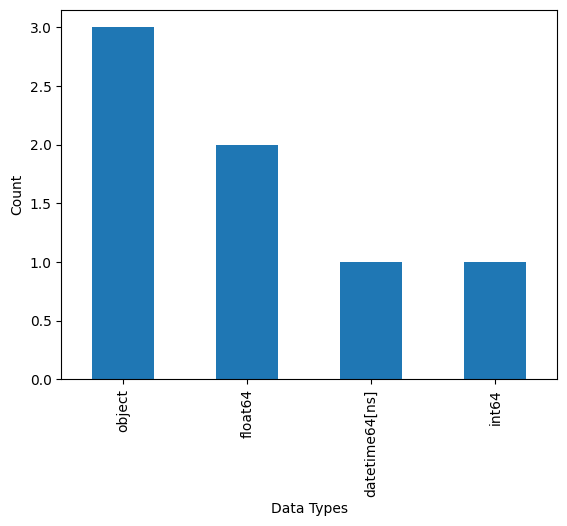

In [7]:
#Plotting
#this creates a bar chart with the data types as the x axis and count as the y axis
sales.dtypes.value_counts().plot(kind="bar", xlabel="Data Types", ylabel="Count")

In [8]:
#Extracting the month, year and week name
sales["Year"] = sales["Date"].dt.year
sales.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue,Year
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,2014
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,2015
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,2015
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,2015
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,2015


In [9]:
sales["Month"] = sales["Date"].dt.month_name()
sales.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue,Year,Month
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,2014,September
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,2015,June
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,2015,September
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,2015,November
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,2015,October


In [10]:
sales["Week"] = sales["Date"].dt.day_name()
sales.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue,Year,Month,Week
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,2014,September,Monday
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,2015,October,Saturday


# Working on KPI's (Key Performance index of this data)


In [11]:
#Total units sold
total_goods_sold = sales["Units"].sum()
print(f"Total goods sold: {total_goods_sold} units.")

Total goods sold: 2121 units.


In [12]:
#Total Revenue
total_revenue = sales["Revenue"].sum()
print(f"Total Revenue: ₦{total_revenue:,}")

Total Revenue: ₦19,627.879999999997


In [13]:
#Average revenue per unit
#round() approximates to 2dp
average_revenue_per_unit = round(total_revenue/total_goods_sold)
print(f"Average revenue per unit: ₦{average_revenue_per_unit}")

Average revenue per unit: ₦9


In [14]:
#Number of products
#.nunique() shows the number of unique values
number_of_products = sales["Products"].nunique()
print(f"Number of products: {number_of_products}")

Number of products: 5


In [15]:
#Number of sales agents
number_of_sales_agents = sales["Sales Agent"].nunique()
print(f"Number of Sales Agents: {number_of_sales_agents}")

Number of Sales Agents: 11


# Woking on insights by creating models and plotting their charts

In [16]:
# #Setting the index using the date column
sales.set_index("Date", inplace=True) 
#do not run twice

In [17]:
sales.head()

,Branch,Sales Agent,Products,Units,Price,Revenue,Year,Month,Week
Date,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,2014,September,Monday
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,2015,October,Saturday


### Calculating the total monthly revenue for year 2015 and plot the chart using 3 visualization packages in pythonl

In [18]:
#prints the unique elements in the column Year
sales.Year.unique()

array([2014, 2015], dtype=int32)

In [19]:
#stores the data for the year 2015 into sales_2015
sales_2015 = sales[sales["Year"] == 2015]
sales_2015.head()

,Branch,Sales Agent,Products,Units,Price,Revenue,Year,Month,Week
Date,,,,,,,,,
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,2015,October,Saturday
2015-12-21,Woji,Tonye,HP,28,4.99,139.72,2015,December,Monday


In [20]:
#Monthly revenue in 2015
sales_2015 = sales[sales["Year"] == 2015]
sales_2015.head()

#using .sort_index() to arrange the output, so the arrangement is done based on the index
total_monthly_revenue = sales_2015.groupby("Month")["Revenue"].sum().sort_index()
total_monthly_revenue

Month
April         610.38
August       1830.90
December     2018.78
February     1324.96
January       413.54
July          996.33
June          625.00
March         389.43
May           787.57
November       54.89
October      1157.49
September     160.27
Name: Revenue, dtype: float64

In [21]:
#this groups the revenue according to the month and arranges it from the highest revenue to the lowest revenue
total_monthly_revenue = sales_2015.groupby("Month")["Revenue"].sum().sort_values(ascending=False)
total_monthly_revenue

Month
December     2018.78
August       1830.90
February     1324.96
October      1157.49
July          996.33
May           787.57
June          625.00
April         610.38
January       413.54
March         389.43
September     160.27
November       54.89
Name: Revenue, dtype: float64

<Axes: xlabel='Month', ylabel='Revenue'>

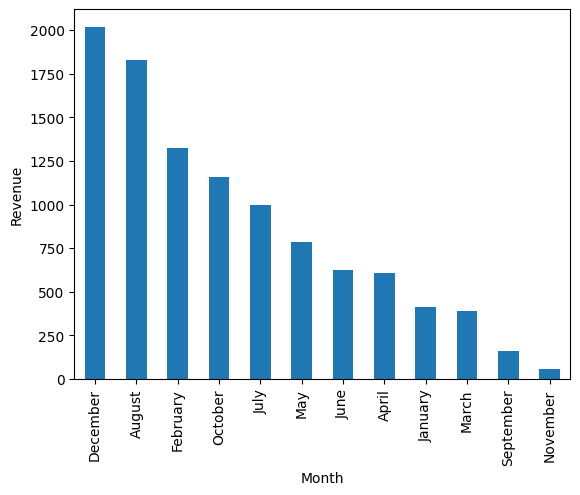

In [22]:
#this plots revenue against month
total_monthly_revenue.plot(kind="bar", xlabel="Month", ylabel="Revenue")

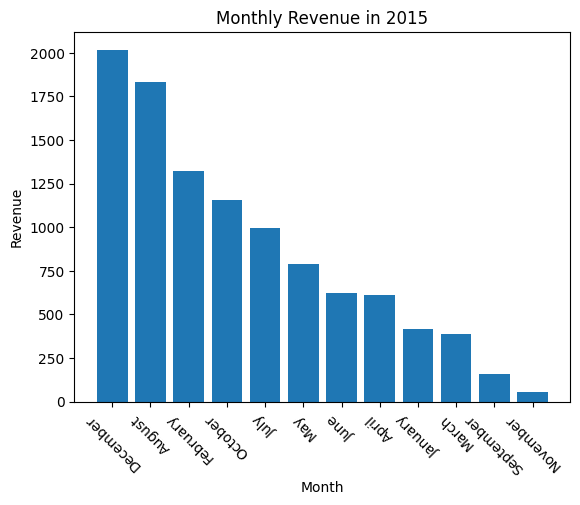

In [23]:
#Using matplotlib
#this prints out a bar chart with revenue on the y axis and values on x axis
plt.bar(total_monthly_revenue.index, total_monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue in 2015")

#this refers the angle at the x lable is being diplayed
plt.xticks(rotation =135)

#this displays just the chart
plt.show()

In [24]:
sales_2014 = sales[sales["Year"] == 2014]
sales_2014.head()

,Branch,Sales Agent,Products,Units,Price,Revenue,Year,Month,Week
Date,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,2014,September,Monday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539.73,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251.72,2014,October,Sunday
2014-02-09,Woji,Tolu,Lenovo,36,4.99,179.64,2014,February,Sunday
2014-01-23,Woji,Emeka,HP,50,19.99,999.50,2014,January,Thursday


In [25]:
monthly_revenue_2014 = sales_2014.groupby("Month")["Revenue"].sum().sort_values(ascending=False)
monthly_revenue_2014

Month
July         1676.90
December     1269.69
January      1188.55
June          988.50
October       827.08
November      778.89
February      719.37
May           512.78
September     505.84
April         448.65
August        174.65
March         167.44
Name: Revenue, dtype: float64

<Axes: xlabel='Month', ylabel='Revenue'>

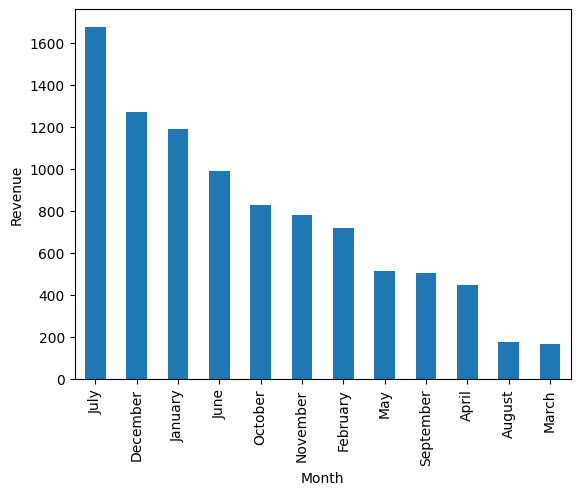

In [26]:
monthly_revenue_2014.plot(kind="bar", xlabel="Month", ylabel="Revenue")

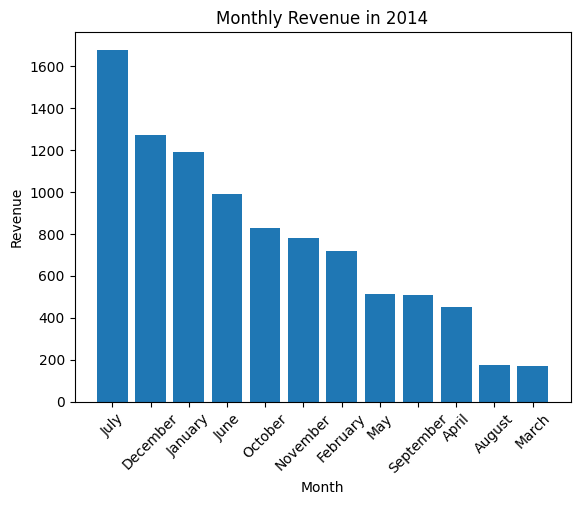

In [27]:
#Using matplotlib
#plt.bar(x axis, y axis)
plt.bar(monthly_revenue_2014.index, monthly_revenue_2014.values)
plt.xticks(rotation = 45)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue in 2014")
plt.show()

### Total Revenue by Branch

In [28]:
#Total revenue by branch
#this prints the unique branches in sales
sales["Branch"].unique()

array(['Woji', 'GRA', 'Town'], dtype=object)

In [29]:
#this groups the sum of revenue according to the branch and sort from highest to lowest
total_revenue_by_branch = sales.groupby("Branch")["Revenue"].sum().sort_values(ascending=False)
total_revenue_by_branch

Branch
Woji    11139.07
GRA      6002.09
Town     2486.72
Name: Revenue, dtype: float64

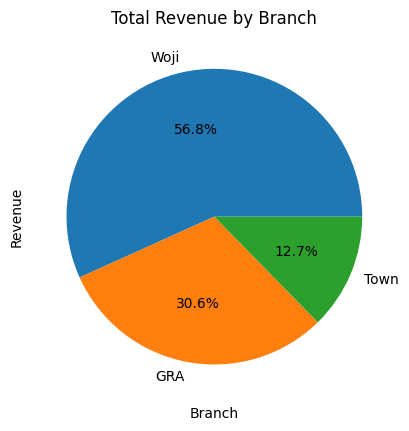

In [30]:
#using matplotlib
#this plots a pie chart with the revenue against branch
#autopct adds percentage to the chart
plt.pie(total_revenue_by_branch.values, labels= total_revenue_by_branch.index, autopct='%1.1f%%')
plt.xlabel("Branch")
plt.ylabel("Revenue")
plt.title("Total Revenue by Branch")
plt.show()

### Calculating revenue by product

In [31]:
sales["Products"].unique()

array(['Apple', 'Lenovo', 'HP', 'Compaq', 'Dell'], dtype=object)

In [32]:
total_revenue_by_product = sales.groupby("Products")["Revenue"].sum().sort_values(ascending=False)
total_revenue_by_product

Products
HP        9577.65
Dell      4169.87
Lenovo    2135.14
Compaq    2045.22
Apple     1700.00
Name: Revenue, dtype: float64

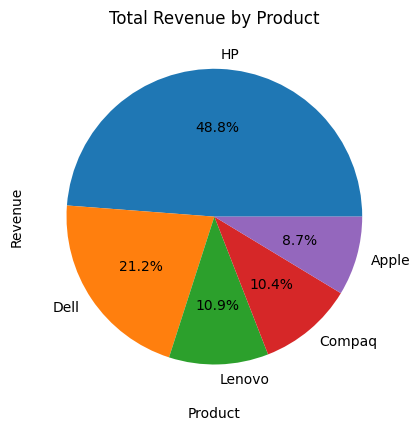

In [33]:
#Using matplotlib
plt.pie(total_revenue_by_product.values, labels=total_revenue_by_product.index, autopct= '%1.1f%%')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Total Revenue by Product")
plt.show()

### Caculating revenue according to sales agents

In [34]:
sales["Sales Agent"].unique()

array(['Chinedu', 'Emeka', 'Ibrahim', 'Tolu', 'Tonye', 'George',
       'Blessing', 'Chioma', 'Torbari', 'Uche', 'Tunde'], dtype=object)

In [35]:
total_revenue_by_sales_agent = sales.groupby("Sales Agent")["Revenue"].sum().sort_values(ascending=False)
total_revenue_by_sales_agent

Sales Agent
Emeka       3109.44
Chioma      3102.30
Tolu        2812.19
Blessing    2363.04
Ibrahim     1749.87
Chinedu     1641.43
George      1387.77
Uche        1283.61
Tunde       1203.11
Torbari      536.75
Tonye        438.37
Name: Revenue, dtype: float64

<Axes: ylabel='Sales Agent'>

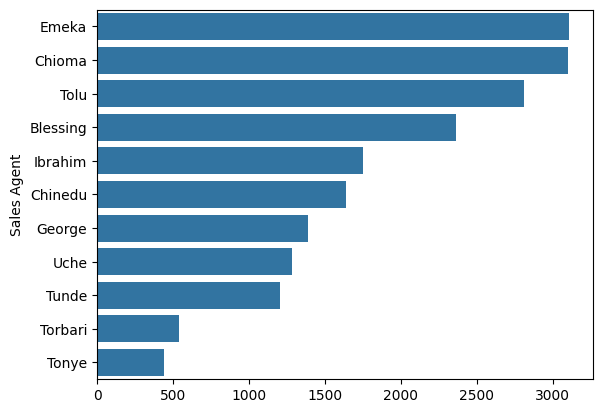

In [40]:
#Plotting using seaborn barchart
sns.barplot(x = total_revenue_by_sales_agent.values, y = total_revenue_by_sales_agent.index, orient= 'h')

### Total revenue by week

In [ ]:
#this group the total revenue for each day of the week, and sorts in descending order
total_revenue_by_week = sales.groupby("Week")["Revenue"].sum().sort_values(ascending= False)
total_revenue_by_week

Week
Monday       3515.17
Friday       3426.63
Tuesday      3388.97
Wednesday    3348.58
Sunday       3146.20
Thursday     1809.96
Saturday      992.37
Name: Revenue, dtype: float64

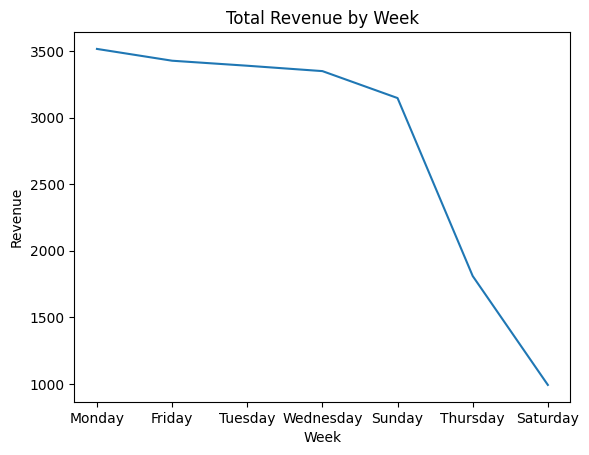

In [45]:
#Plotting using line chart
plt.plot(total_revenue_by_week.index, total_revenue_by_week.values)
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.title("Total Revenue by Week")
plt.show()

### Total revenue by month

In [46]:
total_revenue_by_month = sales.groupby("Month")["Revenue"].sum().sort_values(ascending=False)
total_revenue_by_month

Month
December     3288.47
July         2673.23
February     2044.33
August       2005.55
October      1984.57
June         1613.50
January      1602.09
May          1300.35
April        1059.03
November      833.78
September     666.11
March         556.87
Name: Revenue, dtype: float64

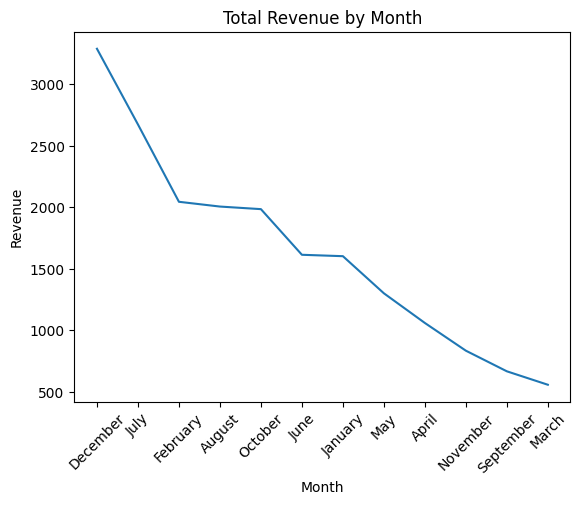

In [48]:
#Plotting using seaborn linechart
sns.lineplot(x = total_revenue_by_month.index, y= total_revenue_by_month.values)
plt.xlabel("Month")
plt.xticks(rotation = 45)
plt.ylabel("Revenue")
plt.title("Total Revenue by Month")
plt.show()

In [ ]:
#prints out the revenue for every month in the year
trends_of_sales_over_the_year = sales.groupby(["Year", "Month"])["Revenue"].sum().reset_index()
trends_of_sales_over_the_year

,Year,Month,Revenue
0,2014,April,448.65
1,2014,August,174.65
2,2014,December,1269.69
3,2014,February,719.37
4,2014,January,1188.55
5,2014,July,1676.90
6,2014,June,988.50
7,2014,March,167.44
8,2014,May,512.78
9,2014,November,778.89


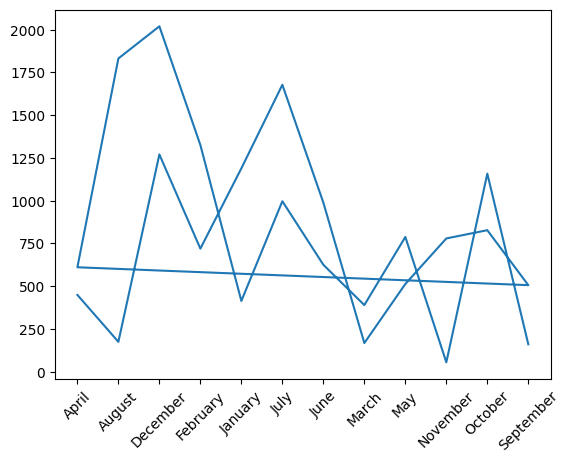

In [53]:
#Plotting
plt.plot(trends_of_sales_over_the_year["Month"], trends_of_sales_over_the_year["Revenue"])
plt.xticks(rotation = 45)
plt.show()